In [1]:
import networkx as nx
import pandas
from hatchet import *
import os
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import igraph
import platform

/Users/jarus/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/jarus/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/jarus/miniconda3/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
# libraries for gromov distance computation.
import numpy as np
import scipy as sp
import ot
from sklearn.decomposition import PCA
#from dim_reduction import incPCA
from sklearn import manifold
#from grave import plot_network

In [3]:
from actions.groupBy import groupBy
from state import State
from callgraph import CallGraph
from preprocess import PreProcess
import diff_callflow_states as diff 

In [4]:
%matplotlib inline

In [5]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [6]:
dataset_path = ["data/lulesh-1/db-ampi4-100-1", "data/lulesh-1/db-ampi4-100-8"]
states = diff.main(dataset_path)

Creating graphframes....
0:/Users/jarus/ucd/Research/Visualisation/projects/CallFlow/data/lulesh-1/db-ampi4-100-1
1:/Users/jarus/ucd/Research/Visualisation/projects/CallFlow/data/lulesh-1/db-ampi4-100-8
Filtering the dataframe!
[Filter] Removed 184457 rows.)
Grafting the graph!
[Graft] 833 rows left
Filtering the dataframe!
[Filter] Removed 300356 rows.)
Grafting the graph!
[Graft] 534 rows left
Shape of the dataframe from graph (data): (833, 10)
Total nodes in the graph 114
3.2981510162353516
Shape of the dataframe from graph (data): (534, 10)
Total nodes in the graph 91
2.56158185005188


Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-8:
Process ForkPoolWorker-2:
Process ForkPoolWorker-5:
Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/jarus/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/jarus/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/jarus/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/jarus/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/jarus/miniconda3/lib/python3.6/multiproce

In [7]:
def getHierarchy(state, module):
    df = state.df
    paths = []
    func_in_module = df.loc[df['module'] == module]['name'].unique().tolist()
    print("Number of functions inside the {0} module: {1}".format(module, len(func_in_module)))
    for idx, func in enumerate(func_in_module):
        mean_inc_time = df.loc[df['name'] == func]['CPUTIME (usec) (I)'].mean()
        mean_exc_time = df.loc[df['name'] == func]['CPUTIME (usec) (E)'].mean()
        paths.append({
            "module": module,
            "opath": df.loc[df['name'] == func]['path'].unique().tolist()[0],
            "path": df.loc[df['name'] == func]['component_path'].unique().tolist()[0],
            "inc_time" : df.loc[df['name'] == func]['CPUTIME (usec) (I)'].mean(),
            "exclusive" : df.loc[df['name'] == func]['CPUTIME (usec) (E)'].mean(),
            "imbalance_perc" : df.loc[df['name'] == func]['imbalance_perc'].mean(),
            "component_level": df.loc[df['name'] == func]['component_level'].unique().tolist()[0],
        })
    return pd.DataFrame(paths)

In [8]:
for idx, state in enumerate(states):
    print("In dataset {0}".format(dataset_path[idx]))
    modules = state.df['module'].unique().tolist()
    for idx, module in enumerate(modules):
        if module =='lulesh2.0':
            paths = getHierarchy(state, module)
            state.paths_df = paths 
            paths.to_csv(str(module + ".csv"))

In dataset data/lulesh-1/db-ampi4-100-1
Number of functions inside the lulesh2.0 module: 32
In dataset data/lulesh-1/db-ampi4-100-8
Number of functions inside the lulesh2.0 module: 28


In [9]:
opath, cpath = states[0].paths_df['opath'].tolist(), states[0].paths_df['path'].tolist()
for idx in range(0, len(opath)):
    print(len(opath[idx]), opath[idx])
    print(len(cpath[idx]), cpath[idx])
    print("\n")

3 ('<partial call paths>', '__correctly_grouped_prefixwc', 'CthStartThread')
2 ('lulesh2.0', 'CthStartThread')


4 ('<partial call paths>', '__correctly_grouped_prefixwc', 'CthStartThread', '_INTERNAL_8_tcharm_C_22509075::startTCharmThread(TCharmInitMsg*)')
3 ('lulesh2.0', 'CthStartThread', '_INTERNAL_8_tcharm_C_22509075::startTCharmThread(TCharmInitMsg*)')


5 ('<partial call paths>', '__correctly_grouped_prefixwc', 'CthStartThread', '_INTERNAL_8_tcharm_C_22509075::startTCharmThread(TCharmInitMsg*)', 'AMPI_threadstart')
4 ('lulesh2.0', 'CthStartThread', '_INTERNAL_8_tcharm_C_22509075::startTCharmThread(TCharmInitMsg*)', 'AMPI_threadstart')


6 ('<partial call paths>', '__correctly_grouped_prefixwc', 'CthStartThread', '_INTERNAL_8_tcharm_C_22509075::startTCharmThread(TCharmInitMsg*)', 'AMPI_threadstart', 'MPI_threadstart_t::start()')
5 ('lulesh2.0', 'CthStartThread', '_INTERNAL_8_tcharm_C_22509075::startTCharmThread(TCharmInitMsg*)', 'AMPI_threadstart', 'MPI_threadstart_t::start()')




In [10]:
df1 = states[0].paths_df
df2 = states[1].paths_df
print(type(df1), type(df2))
merged = df1.merge(df2, indicator=True, how='outer')
merged[merged['_merge'] == 'right_only']
diff = set(zip(df2.name, df2.inc_time)) - set(zip(df1.name, df1.inc_time))
print(len(diff))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


AttributeError: 'DataFrame' object has no attribute 'name'

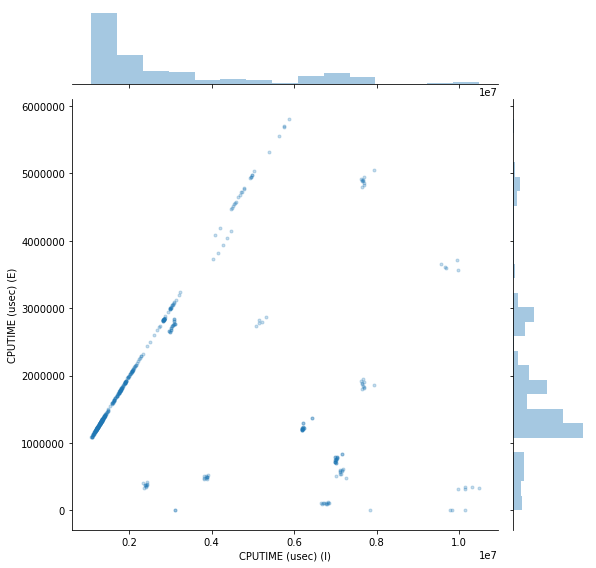

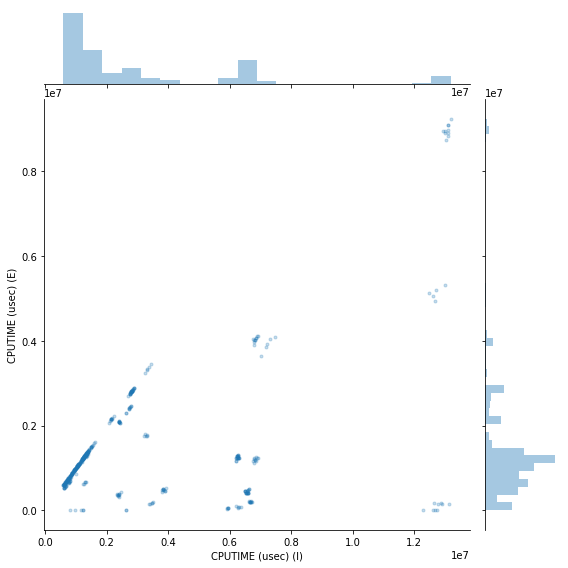

In [10]:
# Joint plot of the Inclusive and Exclusive times.
df = states[0].df
df2 = states[1].df
root_max_df = 107348942.00
root_max_df2 = 145114370.00
sns.jointplot('CPUTIME (usec) (I)', 'CPUTIME (usec) (E)',
              df.loc[(df['CPUTIME (usec) (I)'] < 0.10*107348942.00) &
                     (df['CPUTIME (usec) (E)'] > 0)],
              alpha=.25, marker='.', height=8);
sns.jointplot('CPUTIME (usec) (I)', 'CPUTIME (usec) (E)',
              df2.loc[(df2['CPUTIME (usec) (I)'] < 0.10*145114370.00) &
                     (df2['CPUTIME (usec) (E)'] > 0)],
              alpha=.25, marker='.', height=8);

In [11]:
def add_paths(state, path_name):
    for idx, row in state.df.iterrows():
        state.g.add_path(row[path_name])

In [12]:
def print_graph(states):
    for idx, state in enumerate(states):
        print(state.g.nodes())

In [13]:
def draw_graph(g):
    fig, ax = plt.subplots()
    plot_network(g, )
    plt.show()
    #pos = nx.spectral_layout(g)
    #nx.draw_networkx_nodes(g, pos, cmap=plt.get_cmap('jet'), 
    #                    node_size = 50)
    #nx.draw_networkx_edges(g, pos, edge_color='b', arrows=True)


In [14]:
def add_levels(state):
    levelMap = {}
    track_level = 0
    nodes = state.g.nbunch_iter(state.root)
    
    for start_node in nodes:
        print("Start node", start_node)
        active_nodes = [start_node]
        levelMap[state.root] = 0
        
        for edge in nx.edge_dfs(state.g, start_node, 'original'):
            #rint("Edge {0}".format(edge))
            head_level = None
            tail_level = None
            head, tail = edge[0], edge[1]
            
            if head != start_node:
                active_nodes.append(head)
                
            if head in active_nodes and head != start_node and tail in active_nodes:
                #rint("Cycle", edge)
                edge_data = state.g.get_edge_data(*edge)                                                                             
                state.g.add_node(tail+'_')                                                                                           
                state.g.add_edge(head, tail+'_', data=edge_data)                                                                     
                state.g.node[tail+'_']['name'] = [tail + '_']                                                                        
                #state.g.node[tail+'_']['weight'] = state.g.node[tail]['weight']   
                state.g.remove_edge(edge[0], edge[1])
    return levelMap

In [15]:
 def flow_map(state):                                                                                                                 
        flowMap = {}                                                                                                                    
        nodes = state.g.nbunch_iter(state.root)                                                                                           
        for start_node in nodes:                                                                                                        
            for edge in nx.edge_dfs(state.g, start_node, 'original'):                                                                    
                head_level = None                                                                                                       
                tail_level = None                                                                                                       
                head, tail = self.tailhead(edge)                                                                                        
                                                                                                                                        
                # Check if there is an existing level mapping for the head node and assign.                                             
                if head in self.level_mapping.keys():                                                                                   
                    head_level =  self.level_mapping[head]                                                                              
                                                                                                                                        
                # Check if there is an existing level mapping for the tail node and assign.                                             
                if tail in self.level_mapping.keys():                                                                                   
                    tail_level = self.level_mapping[tail]                                                                               
                                                                                                                                        
                flowMap[(edge[0], edge[1])] = (int(head_level), int(tail_level))                                                        
        return flowMap 

In [16]:
def calculate_flows(state):
    graph = state.g
    ret = {}                                                                                                                                                                                                                                                                          
    edges = graph.edges()                                                                                                                                                                                                                                                             
    additional_flow = {}                                                                                                                                                                                                                                                              
                                                                                                                                                                                                                                                                                          
    # Calculates the costs in cycles and aggregates to one node.                                                                                                                                                                                                                      
    for edge in edges:                                                                                                                                                                                                                                                                
        source = edge[0]                                                                                                                                                                                                                                                              
        target = edge[1]                                                                                                                                                                                                                                                              
                                                                                                                                                                                                                                                                                          
        if source.endswith('_'):                                                                                                                                                                                                                                                      
            cycle_node = source                                                                                                                                                                                                                                                       
            cycle_node_df = self.state.lookup_with_nodeName(cycle_node[:-1])                                                                                                                                                                                                      
            additional_flow[cycle_node] = cycle_node_df['CPUTIME (usec) (I)'].max()                                                                                                                                                                                                   
        elif target.endswith('_'):                                                                                                                                                                                                                                                    
            cycle_node = target                                                                                                                                                                                                                                                       
            cycle_node_df = state.lookup_with_nodeName(cycle_node[:-1])                                                                                                                                                                                                      
            additional_flow[cycle_node] = cycle_node_df['CPUTIME (usec) (I)'].max()                                                                                                                                                                                                   
                                                                                                                                                                                                                                                                                          
    for edge in edges:                                                                                                                                                                                                                                                                
        added_flow = 0                                                                                                                                                                                                                                                                
        if edge[0].endswith('_'):                                                                                                                                                                                                                                                     
            ret[edge] = additional_flow[edge[0]]                                                                                                                                                                                                                                      
            continue                                                                                                                                                                                                                                                                  
        elif edge[1].endswith('_'):                                                                                                                                                                                                                                                   
            ret[edge] = additional_flow[edge[1]]                                                                                                                                                                                                                                      
            continue                                                                                                                                                                                                                                                                  
        source = state.lookup_with_nodeName(edge[0])                                                                                                                                                                                                                         
        target = state.lookup_with_nodeName(edge[1])                                                                                                                                                                                                                         
                                                                                                                                                                                                                                                                                          
        source_inc = source['CPUTIME (usec) (I)'].max()                                                                                                                                                                                                                               
        target_inc = target['CPUTIME (usec) (I)'].max()                                                                         
                                                                                                                                                                                                                                                                                          
        if source_inc == target_inc:                                                                                                                                                                                                                                                  
            ret[edge] = source_inc                                                                                                                                                                                                                                                    
        else:                                                                                                                                                                                                                                                                         
            ret[edge] = target_inc    
    return ret   

In [17]:
def add_edge_attributes(state):
    capacity_mapping = calculate_flows(state)    
    nx.set_edge_attributes(state.g, name='weight', values=capacity_mapping)

In [18]:
for idx, state in enumerate(states):
    state.g = nx.DiGraph()
    state.root = state.lookup_with_node(state.graph.roots[0])['name'][0]
    state.rootInc = state.lookup_with_node(state.graph.roots[0])['CPUTIME (usec) (I)'].max()
    add_paths(state, 'path')
    state.levelMap = add_levels(state)
    add_edge_attributes(state)  
   # draw_graph(state.g)

Start node <partial call paths>
Start node <partial call paths>


In [19]:
def generic_map(df, nodes, attr):
    ret = {}
    for node in nodes:            
        if attr == 'CPUTIME (usec) (I)':
            ret[node] = df[df['name'] == node][attr].mean()
        else:
            ret[node] = df[df['name'] == node][attr].unique().tolist()     
    return ret

In [20]:
def add_node_attributes(state):
    module_mapping = generic_map(state.df, state.g.nodes(), 'module')
    nx.set_node_attributes(state.g, name='module', values=module_mapping)
    
    time_mapping = generic_map(state.df, state.g.nodes(), 'CPUTIME (usec) (I)')
    nx.set_node_attributes(state.g, name='time', values=time_mapping)

In [57]:
def create_flow_matrix(state, module):
    g = state.g
    add_node_attributes(state)
    all_nodes = g.nodes(data=True)
    nodes = [x for x,y in g.nodes(data=True) if y['module'] == [module]]
    # nodesInModule = filter(lambda (n, d): d['module'] == start_node, g.nodes(data=True))
    state.nodeKey = {}
    for idx, node in enumerate(all_nodes):
        state.nodeKey[node[0]] = idx
    
    flow_matrix = np.zeros(shape=(len(all_nodes),len(all_nodes)))
    flow_matrix.astype(float)

    root_inc = g.node[nodes[0]]['time']
    
    for idx, node in enumerate(nodes):
        neighbors = sorted(g[node].items(), key=lambda edge: edge[1]['weight'])
        for idx, n in enumerate(neighbors):
            sourceKey = int(state.nodeKey[node])
#            print(state.df[state.df['node' == n[0]]])
            targetKey = int(state.nodeKey[n[0]])
            weight = n[1]['weight']
            flow_matrix[sourceKey][targetKey] = n[1]['weight']/(1.0*root_inc)
    return flow_matrix

start_node = 'lulesh2.0'
for idx, state in enumerate(states):
    state.flow_matrix = create_flow_matrix(state, start_node)
    #print(state.flow_matrix)
    #plt.matshow(state.flow_matrix)

In [206]:
def source_target_to_adj_matrix(arr):
    key_map = {}
    x_arr = []
    for idx, elem in enumerate(arr):
        if elem['source'] not in x_arr and elem['source'] not in key_map:
            key_map[elem['source']] = len(x_arr)
            x_arr.append(elem['source'])
        if elem['target'] not in x_arr and elem['target'] not in key_map:
            key_map[elem['target']] = len(x_arr)
            x_arr.append(elem['target'])
            
    x, y = len(list(set(x_arr))), len(list(set(x_arr)))
    adj_matrix = np.zeros(shape=(x, y))
    
    for idx, elem in enumerate(arr):
        source_elem_pos = key_map[elem['source']]
        target_elem_pos = key_map[elem['target']]
        adj_matrix[source_elem_pos][target_elem_pos] = elem['weight']
    
    print(key_map)
    return adj_matrix

In [223]:
def module_hierarchy(state, module):
    g = state.g
    hierarchy = nx.Graph()
    source_target_data = []
    nodes = [x for x,y in g.nodes(data=True) if y['module'] == [module]]
    entry_node = nodes[0]
    for idx, node in enumerate(nodes):
        hierarchy_pd = pd.DataFrame(columns=['source', 'target', 'weight', 'level', 'type'])
        neighbors = sorted(g[node].items(), key=lambda edge: edge[1]['weight'])
        for idx, n in enumerate(neighbors):
            source_node = node
            target_node = n[0]
            weight = n[1]['weight']
            level = idx
            curr_module = state.df[state.df['name'] == n[0]]['module'].unique()[0]
            #print(n[0], curr_module)
            if(curr_module != module):
                type_node = 'exit'
                level = -1
                #print('{0} is an exit node'.format(n[0]))
            else:
                type_node = 'normal'
            source_target_data.append({
                "source": source_node,
                "target": target_node,
                "weight": weight,
                "level": level,
                "type": type_node
            })
    hierarchy_adj_matrix = source_target_to_adj_matrix(source_target_data)
    #hierarchy_adj_matrix[1][1] = 0.0
    #print(nx.find_cycle(state.hg, orientation="original"))
    #print(nx.is_tree(state.hg))
    state.hg = nx.from_numpy_matrix(hierarchy_adj_matrix)
    state.bfs_tree = nx.maximum_spanning_tree(state.hg)
    pos = hierarchy_pos(state.bfs_tree, 1)
    nx.draw(state.bfs_tree, pos=pos, with_labels=True)
    plt.show()
    return source_target_data

{'CthStartThread': 0, '_INTERNAL_8_tcharm_C_22509075::startTCharmThread(TCharmInitMsg*)': 1, 'AMPI_threadstart': 2, 'MPI_threadstart_t::start()': 3, 'AMPI_Fallback_Main': 4, 'AMPI_Main_cpp(int, char**)': 5, 'Loop@lulesh.cc:2790': 6, '_INTERNAL_9_lulesh_cc_07ac9422::LagrangeLeapFrog(Domain&)': 7, '_INTERNAL_9_lulesh_cc_07ac9422::LagrangeNodal(Domain&)': 8, '_INTERNAL_9_lulesh_cc_07ac9422::LagrangeElements(Domain&, int)': 9, '_INTERNAL_9_lulesh_cc_07ac9422::CalcForceForNodes(Domain&)': 10, '_INTERNAL_9_lulesh_cc_07ac9422::CalcVolumeForceForElems(Domain&)': 11, '_INTERNAL_9_lulesh_cc_07ac9422::IntegrateStressForElems(Domain&, double*, double*, double*, double*, int, int)': 12, '_INTERNAL_9_lulesh_cc_07ac9422::CalcHourglassControlForElems(Domain&, double*, double)': 13, 'Loop@lulesh.cc:550': 14, 'void Release<double>(double**)': 15, '_INTERNAL_9_lulesh_cc_07ac9422::CalcFBHourglassForceForElems(Domain&, double*, double*, double*, double*, double*, double*, double*, double, int, int)': 16, '

NetworkXError: Node 7 has no position.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


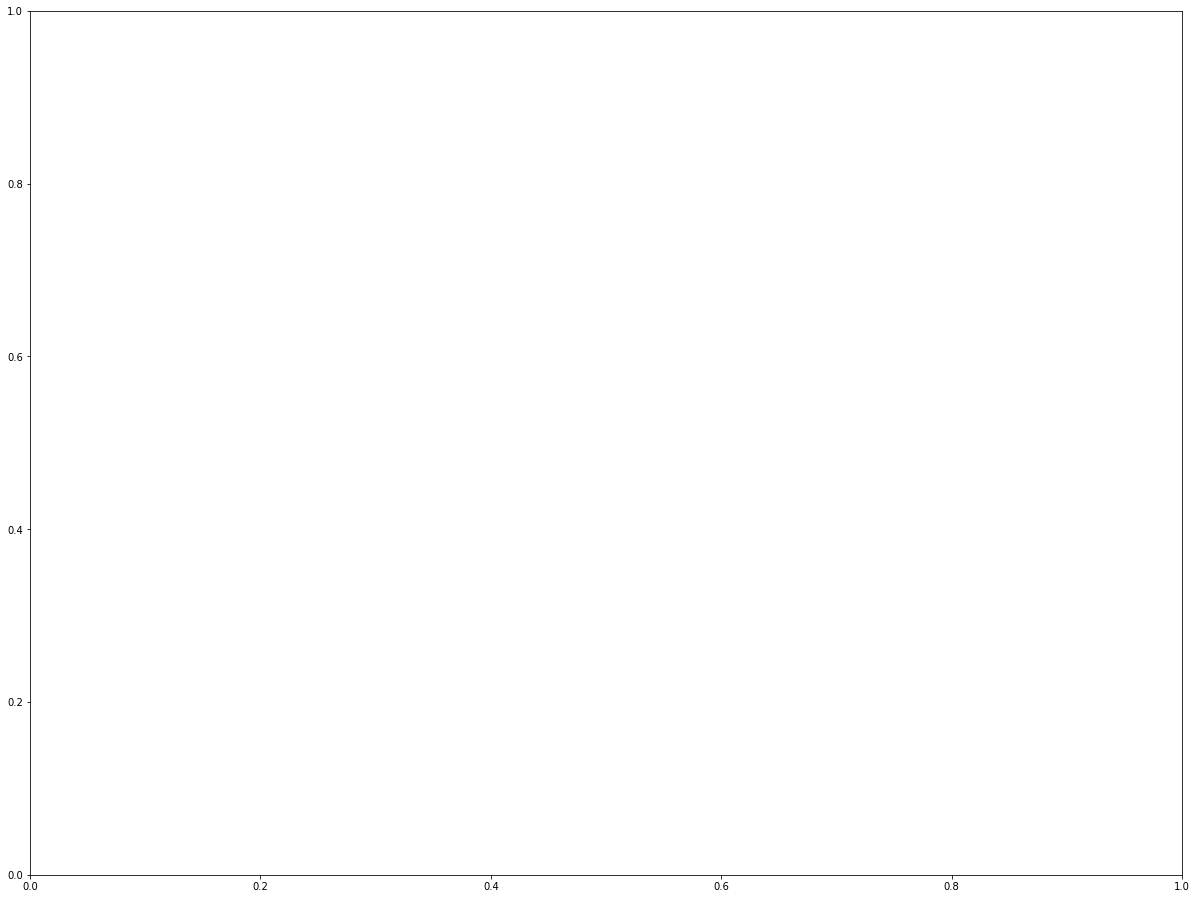

In [224]:
module = 'lulesh2.0'
#module = 'Unkno'
hierarchy_data = module_hierarchy(states[0], module)
hierarchy_data2 = module_hierarchy(states[1], module)


In [121]:
def draw_graph(state, module):
    g = state.g
    hierarchy = nx.Graph()
    source_target_data = []
    nodes = [x for x,y in g.nodes(data=True) if y['module'] == [module]]
    node = 'CthStartThread'
    for idx, node in enumerate(nodes):
        hierarchy_pd = pd.DataFrame(columns=['source', 'target', 'weight', 'level', 'type'])
        neighbors = sorted(g[node].items(), key=lambda edge: edge[1]['weight'])
        for idx, n in enumerate(neighbors):
            #print("source: {0}, target: {1}".format(node, n[0]))
            source_node = node
            target_node = n[0]
            weight = n[1]['weight']
            level = idx
            if(state.df[state.df['name'] == n[0]]['module'].unique()[0] != module):
                type_node = 'exit'
                level = -1
                print('{0} is an exit node'.format(n[0]))
            else:
                type_node = 'normal'
            source_target_data.append({
                "source": source_node,
                "target": target_node,
                "weight": weight,
                "level": level,
                "type": type_node
            })
    hierarchy_df = pd.DataFrame.from_dict(source_target_data)
    print(hierarchy_df.shape)
    hierarchy_adjacency = source_target_to_adj_matrix(source_target_data)
    state.hg = nx.from_numpy_matrix(hierarchy_adjacency.values)
    pos = hierarchy_pos(state.hg, 1)
    nx.draw(state.hg, pos=pos, with_labels=True)
    plt.show()

draw_graph(states[0], 'lulesh2.0')

Loop@lulesh.cc:2790 is an exit node
Loop@lulesh.cc:550 is an exit node
Loop@lulesh.cc:1038 is an exit node
Loop@lulesh.cc:811 is an exit node
__munmap is an exit node
Loop@lulesh.cc:1539 is an exit node
Loop@lulesh.cc:1647 is an exit node
Loop@lulesh.cc:1964 is an exit node
Loop@lulesh.cc:1799 is an exit node
Loop@lulesh.cc:2429 is an exit node
Loop@lulesh.cc:2327 is an exit node
Loop@lulesh.cc:2267 is an exit node
Loop@lulesh.cc:2130 is an exit node
Loop@lulesh.cc:2092 is an exit node
Loop@lulesh.cc:2183 is an exit node
Loop@lulesh.cc:2105 is an exit node
Loop@lulesh.cc:2146 is an exit node
Loop@lulesh.cc:2052 is an exit node
Loop@lulesh.cc:2059 is an exit node
(40, 5)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [26]:
def get_adjcency(nodelist):
    x_pd = nx.to_pandas_adjacency(g, nodelist=nodes, dtype=int)   

In [204]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723 

    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch 
    - if the tree is directed and this is not given, the root will be found and used
    - if the tree is directed and this is given, then the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    #if not nx.is_tree(G):
     #   raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
        print(root)
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [27]:
xs = np.array([states[0].flow_matrix, states[1].flow_matrix])
print(xs)

[ array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])]


AttributeError: 'list' object has no attribute 'max'

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


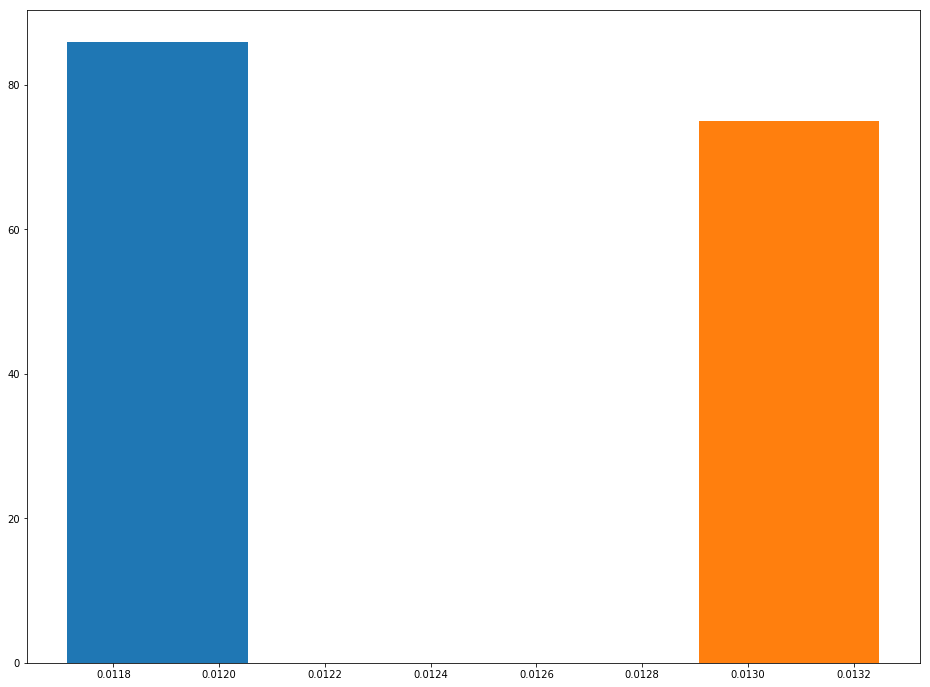

In [120]:
S = len(states)

n_samples = 76
ns = [len(xs[s]) for s in range(S)]

Cs = [sp.spatial.distance.cdist(xs[s], xs[s]) for s in range(S)]
Cs = [cs / cs.max() for cs in Cs]

ps = [ot.unif(ns[s]) for s in range(S)]
p = ot.unif(n_samples)

n_bins = 2

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = plt.hist(ps, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.yaxis.set_major_formatter(PercentFormatter(xmax=1))

[[0.3333333333333333, 0.6666666666666666], [0.6666666666666666, 0.3333333333333333]]


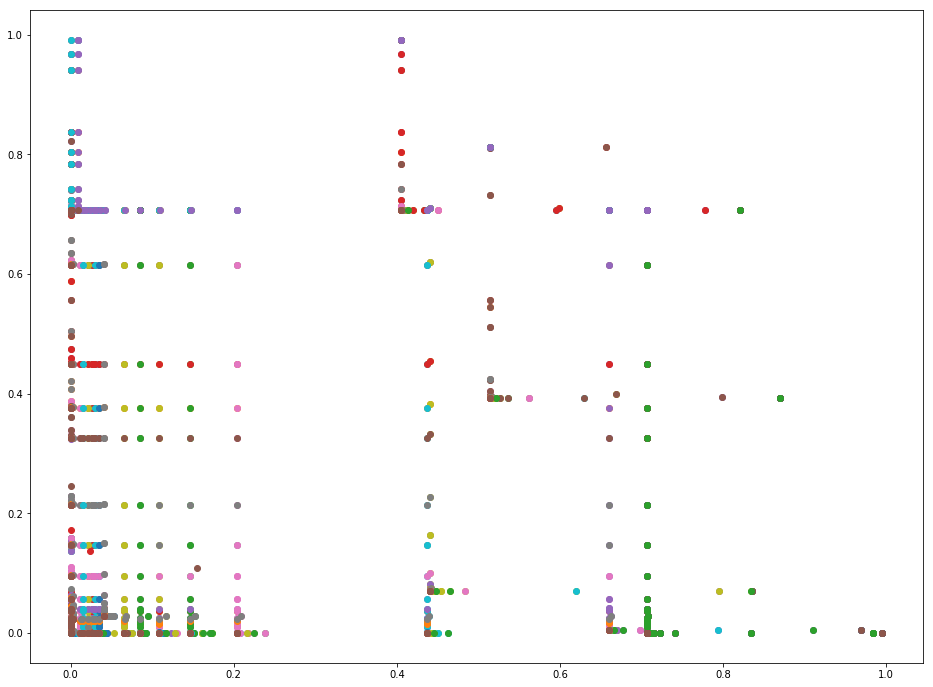

In [29]:
lambdast = [[float(i) / 3, float(3 - i) / 3] for i in [1, 2]]
print(lambdast)
Ct01 = [0 for i in range(2)]
for i in range(S):
    Ct01[i] = ot.gromov.gromov_barycenters(n_samples, [Cs[0], Cs[1]],
                                           [ps[0], ps[1]
                                            ], p, lambdast[i], 'square_loss',  # 5e-4,
                                           max_iter=100, tol=1e-3)


plt.plot(Ct01[0], Ct01[1], 'o', label = 'Ct01')
plt.show()


In [30]:
def smacof_mds(C, dim, max_iter=3000, eps=1e-9):
    """
    Returns an interpolated point cloud following the dissimilarity matrix C
    using SMACOF multidimensional scaling (MDS) in specific dimensionned
    target space

    Parameters
    ----------
    C : ndarray, shape (ns, ns)
        dissimilarity matrix
    dim : int
          dimension of the targeted space
    max_iter :  int
        Maximum number of iterations of the SMACOF algorithm for a single run
    eps : float
        relative tolerance w.r.t stress to declare converge

    Returns
    -------
    npos : ndarray, shape (R, dim)
           Embedded coordinates of the interpolated point cloud (defined with
           one isometry)
    """

    rng = np.random.RandomState(seed=3)

    mds = manifold.MDS(
        dim,
        max_iter=max_iter,
        eps=1e-9,
        dissimilarity='precomputed',
        n_init=1)
    pos = mds.fit(C).embedding_

    nmds = manifold.MDS(
        2,
        max_iter=max_iter,
        eps=1e-9,
        dissimilarity="precomputed",
        random_state=rng,
        n_init=1)
    npos = nmds.fit_transform(C, init=pos)

    return npos

ValueError: invalid number of arguments

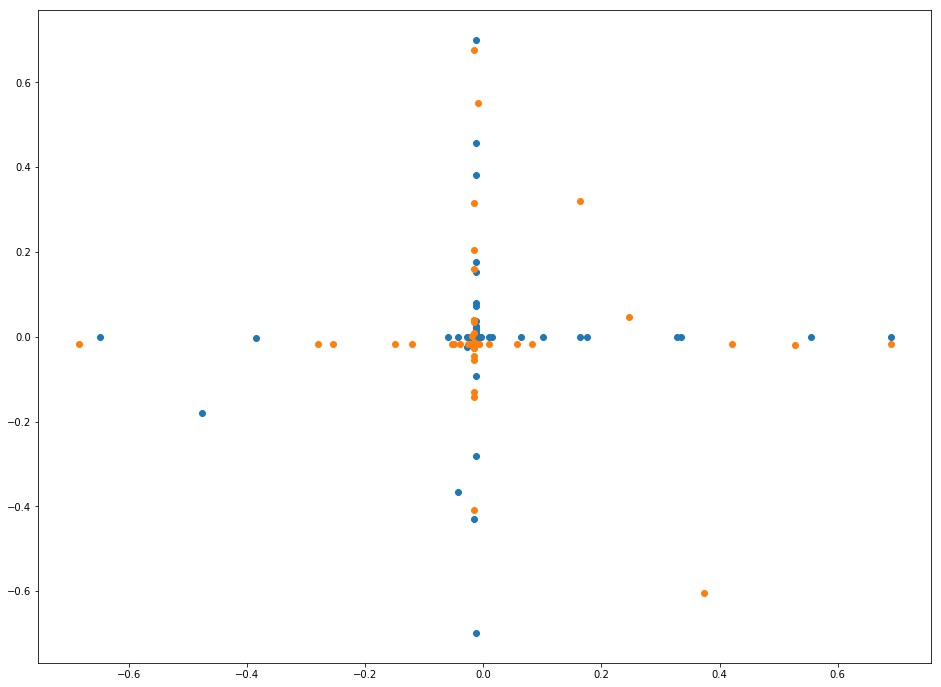

<Figure size 720x720 with 0 Axes>

In [31]:
clf = PCA(n_components=2)
npos = [0, 0]
npos = [smacof_mds(Cs[s], 2) for s in range(S)]

npost01 = [0, 0]
npost01 = [smacof_mds(Ct01[s], 2) for s in range(2)]
npost01 = [clf.fit_transform(npost01[s]) for s in range(2)] 

#print(npost01)
plt.plot(npost01[0], npost01[1], 'o', label = 'npost01')
#plt.show()

#plt.plot(npos[0], npos[1], 'o', label = 'npos')
#plt.show()

nx01min = npos[0][0][0]
nx01max = npos[0][0][0]
ny01min = npos[0][1][1]
ny01max = npos[0][1][1]

nx02min = npos[1][0][0]
nx02max = npos[1][0][0]
ny02min = npos[1][1][1]
ny02max = npos[1][1][1]

for idx, arr in enumerate(npos):
    if arr[0][0] < nx01min:
        nx01min = arr[0][0]
    else:
        pass
    
    if arr[0][1] > nx01max:
        nx01max = arr[0][1]
    else:
        pass
    
    if arr[1][0] < ny01min:
        ny01min = arr[1][0]
    else:
        pass
    
    if arr[1][1] > ny01max:
        ny01max = arr[1][1]
    else:
        pass


for idx, arr in enumerate(npost01):
    if arr[0][0] < nx02min:
        nx02min = arr[0][0]
    else:
        pass
    
    if arr[0][1] > nx02max:
        nx02max = arr[0][1]
    else:
        pass
    
    if arr[1][0] < ny02min:
        ny02min = arr[1][0]
    else:
        pass
    
    if arr[1][1] > ny02max:
        ny02max = arr[1][1]
    else:
        pass

fig = plt.figure(figsize=(10, 10))

x1 = []
y1 = []
for idx, val in enumerate(npost01[0]):
    x1.append(val[0])
    y1.append(val[1])
    
x2 = []
y2 = []
for idx, val in enumerate(npost01[1]):
    x2.append(val[0])
    y2.append(val[1])

x1 = np.asarray(x1)
x2 = np.asarray(x2)
y1 = np.asarray(y1)
y2 = np.asarray(y2)

x1min = np.minimum(x1)
x2min = np.minimum(x2)
x1max = np.maximum(x1)
x2max = np.maximum(x2)

y1min = np.minimum(y1)
y2min = np.minimum(y2)
y1max = np.maximum(y1)
y2max = np.maximum(y2)
#ax1 = plt.subplot2grid((1, 1), (0, 0))  
#plt.xlim((nx01min - 0.1, nx01max + 0.1))
#plt.ylim((ny01min - 0.1, ny01max + 0.1))
#ax1.scatter(npos[0][:, 0], npos[0][:, 1], color='r')

ax2 = plt.subplot2grid((1, 2), (0, 1))
plt.xlim(x1min, x1max)
plt.ylim(y1min, y1max)
ax2.scatter(x1, y1, color='b')
ax2.scatter(x2, y2, color='r')

print(x1, x2)
print(y1, y2)